In [1]:
#Kaggle data topic: 
#E-commerce : Transactional data for predictive analysis: To build predictive models on online shopping portal data streams 
#Data sets: 1. https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
#Contains: 23486 rows and 10 feature variables where each row corresponds to a customer review. 
#The 10 feature variables are:
#Clothing ID: Integer/Categorical variable
#Age: Positive integer variable of the reviewer’s age
#Title: String for review title
#Review Text: String variable for review body
#Rating: Positive integer, 1 worst to 5 best
#Recommended IND: Binary, 1 recommended, 0 not recommended
#Positive Feedback Count: Positive integer of # of customers who found the review helpful
#Division Name: Categorical name of the product high level division
#Department Name: Categorical name of the product department name.
#Class Name: Categorical name of the product class name.


In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
# Step1: Explore and cleaning the data set
# Read the data from csv file
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print("# of features in dataset are =", df.shape[1])
print("# of samples in dataset are =", df.shape[0])
#List name of features
print("Features of data set are =", df.columns)
#List datatypes of features
print("Feature datatypes are=",df.dtypes)
# Drop Unamed feature from dataset
df1 = df.drop(columns=['Unnamed: 0'])
#Updated features
print("Features of data set are =", df1.columns)

# of features in dataset are = 11
# of samples in dataset are = 23486
Features of data set are = Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')
Feature datatypes are= Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
Features of data set are = Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [4]:
# Investigate the data set for any null values
for col in df1.columns.to_list():
    #print("Column", col, "NaN value count=", df1[col].isna().sum())
    if(df1[col].isna().sum()!=0):
        print("Column has null count=",col, df1[col].isna().sum(), "and their datatype is",df1[col].dtypes )
    

Column has null count= Title 3810 and their datatype is object
Column has null count= Review Text 845 and their datatype is object
Column has null count= Division Name 14 and their datatype is object
Column has null count= Department Name 14 and their datatype is object
Column has null count= Class Name 14 and their datatype is object


In [5]:
# Since all are string type, will replace those null values with ''
for col in df1.columns.to_list():
    if(df1[col].isna().sum()!=0):
            df1[col] = df1[col].fillna('')
            print("After replacement", col, "NaN value count=",df1[col].isna().sum())

After replacement Title NaN value count= 0
After replacement Review Text NaN value count= 0
After replacement Division Name NaN value count= 0
After replacement Department Name NaN value count= 0
After replacement Class Name NaN value count= 0


<AxesSubplot:xlabel='Department Name', ylabel='count'>

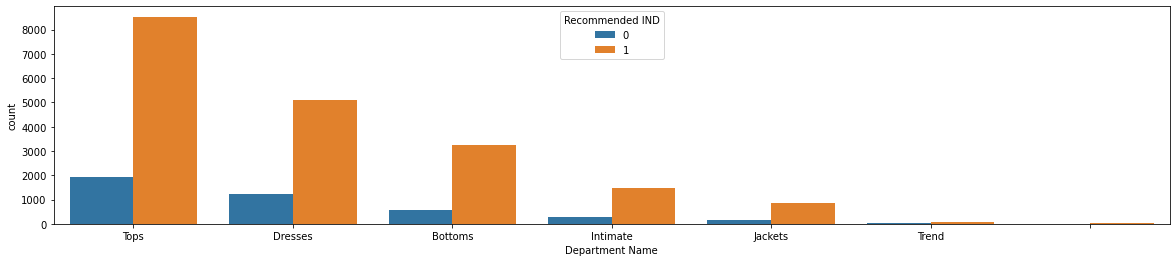

In [6]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df1, x='Department Name', order=df1['Department Name'].value_counts().sort_values(ascending=False).index, hue='Recommended IND')

<AxesSubplot:xlabel='Class Name', ylabel='count'>

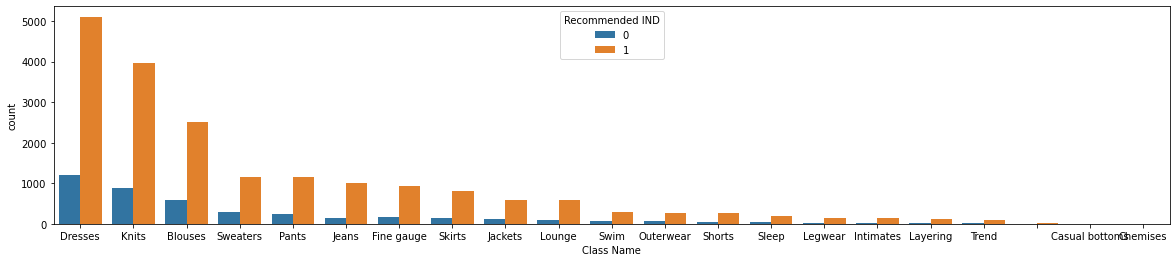

In [7]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df1, x='Class Name', order=df1['Class Name'].value_counts().sort_values(ascending=False).index, hue='Recommended IND')

<AxesSubplot:xlabel='Age', ylabel='count'>

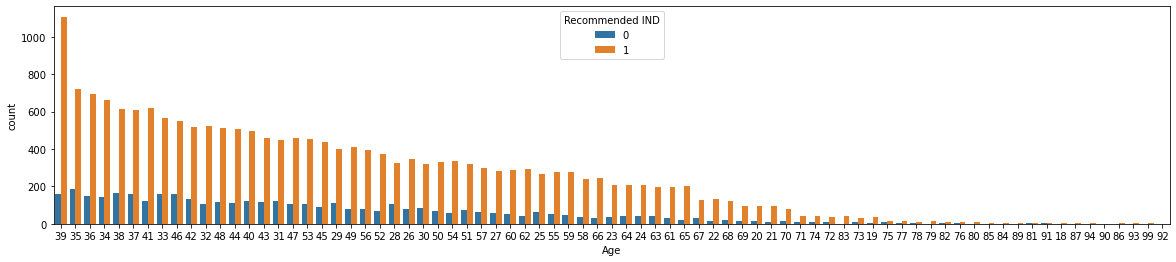

In [8]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df1, x='Age', order=df1['Age'].value_counts().sort_values(ascending=False).index, hue='Recommended IND')

<AxesSubplot:xlabel='Rating', ylabel='count'>

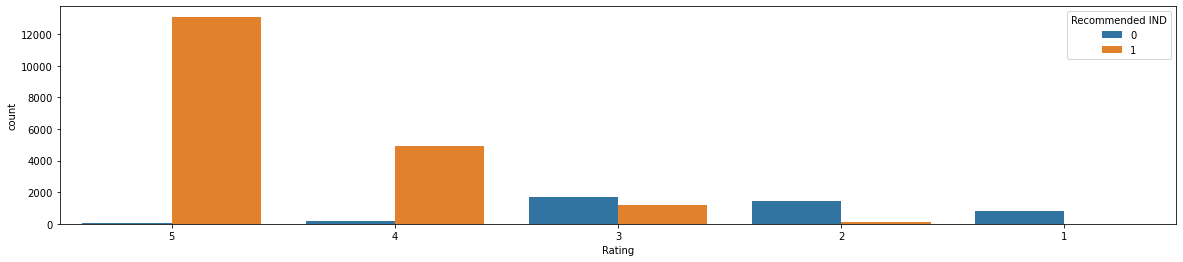

In [9]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df1, x='Rating', order=df1['Rating'].value_counts().sort_values(ascending=False).index, hue='Recommended IND')

In [10]:
'''corr = df1['Rating'].corr(df1['Recommended IND'])
corr2 = df1['Recommended IND'].corr(df1['Age'])
print(corr,corr2)'''
#print(np.count_nonzero(pd.unique(df1['Rating'][df1['Rating']==i][df1['Recommended IND']==1])))''
#Interesting that even when the rating is <=3, there is recommendation for certain products
for i in range(1,4):
    print('Total count with Rating', df1['Rating'][df1['Rating']==i].value_counts())
    print('Recommended count with Rating',df1['Rating'][df1['Rating']==i][df1['Recommended IND']==0].value_counts())
    print('Not Recommended count with Rating', df1['Rating'][df1['Rating']==i][df1['Recommended IND']==1].value_counts())

Total count with Rating 1    842
Name: Rating, dtype: int64
Recommended count with Rating 1    826
Name: Rating, dtype: int64
Not Recommended count with Rating 1    16
Name: Rating, dtype: int64
Total count with Rating 2    1565
Name: Rating, dtype: int64
Recommended count with Rating 2    1471
Name: Rating, dtype: int64
Not Recommended count with Rating 2    94
Name: Rating, dtype: int64
Total count with Rating 3    2871
Name: Rating, dtype: int64
Recommended count with Rating 3    1682
Name: Rating, dtype: int64
Not Recommended count with Rating 3    1189
Name: Rating, dtype: int64


<Figure size 1440x288 with 0 Axes>

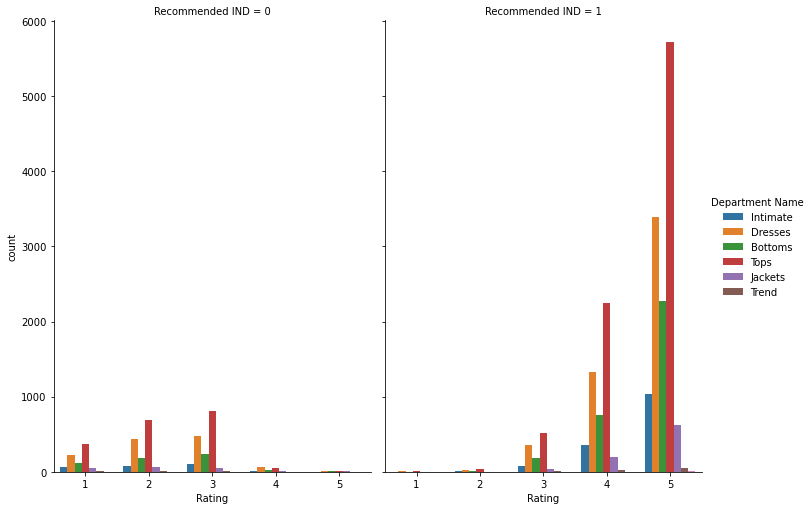

In [11]:
plt.figure(figsize=(20, 4))
#sns.countplot(data=df1, x='Rating', order=df1['Rating'].value_counts().sort_values(ascending=False).index, hue='Department Name')
sns.catplot(x="Rating", hue="Department Name", col="Recommended IND",
                data=df1, kind="count",height=7,aspect=0.7)
#Interesting that for products with rating <=3 they are recommended and for products with rating >3 they have not been recommended.


In [13]:
df1.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [28]:
categorical_columns = list(df1.select_dtypes(include='object'))
print(categorical_columns)
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
df1_mod = pd.get_dummies(df1,columns=categorical_columns)
print(df1_mod.shape)
#One-hot encode results in huge # of columns, doesnt seem like a good idea!

['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']
(23486, 36666)


In [19]:
print(df1['Title'].value_counts())

                                             3810
Love it!                                      136
Beautiful                                      95
Love                                           88
Love!                                          84
                                             ... 
Wait for a sale                                 1
Darling cardigan with beautiful detailing       1
Great corduroy by pilcro                        1
So mixed on these                               1
Highly recommend!                               1
Name: Title, Length: 13994, dtype: int64


In [41]:
# dropping Title, Review Text from the data frame 
print("Before", df1.columns)
df2 = df1.drop(columns =['Title', 'Review Text'])
print("After", df2.columns)
#print datatypes after drop
print("datatypes after",df2.dtypes)
#One hot encode this dataframe
categorical_columns = list(df2.select_dtypes(include='object'))
print(categorical_columns)
df2_mod = pd.get_dummies(df2,columns=categorical_columns)
print(df2_mod.shape)
print("columns after one-hot encode", df2_mod.columns)
print("datatype for each column =",df2_mod.dtypes)


Before Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')
After Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')
datatypes after Clothing ID                 int64
Age                         int64
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
['Division Name', 'Department Name', 'Class Name']
(23486, 37)
columns after one-hot encode Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name_', 'Division Name_General',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Department Name_

In [52]:
# Extract the target values from the  DataFrame
y = np.reshape((df2_mod.loc[:,'Recommended IND']).values,(-1,1))
print(y.shape)
# Drop the target column from the training DataFrame
df2_mod_feat = df2_mod.drop(columns=['Recommended IND'])
print(df2_mod_feat.columns)
print(df2_mod_feat.shape)


(23486, 1)
Index(['Clothing ID', 'Age', 'Rating', 'Positive Feedback Count',
       'Division Name_', 'Division Name_General',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Department Name_', 'Department Name_Bottoms',
       'Department Name_Dresses', 'Department Name_Intimate',
       'Department Name_Jackets', 'Department Name_Tops',
       'Department Name_Trend', 'Class Name_', 'Class Name_Blouses',
       'Class Name_Casual bottoms', 'Class Name_Chemises',
       'Class Name_Dresses', 'Class Name_Fine gauge', 'Class Name_Intimates',
       'Class Name_Jackets', 'Class Name_Jeans', 'Class Name_Knits',
       'Class Name_Layering', 'Class Name_Legwear', 'Class Name_Lounge',
       'Class Name_Outerwear', 'Class Name_Pants', 'Class Name_Shorts',
       'Class Name_Skirts', 'Class Name_Sleep', 'Class Name_Sweaters',
       'Class Name_Swim', 'Class Name_Trend'],
      dtype='object')
(23486, 36)


In [53]:
#Inspect how balanced y is
# Compute the fraction of positive values in the target
fp = np.mean(y)
print("fraction=",fp)


fraction= 0.8223622583666865


In [54]:
print(f'The  df currently has {df2_mod_feat.shape[1]} features')

The  df currently has 36 features


(36, 36)


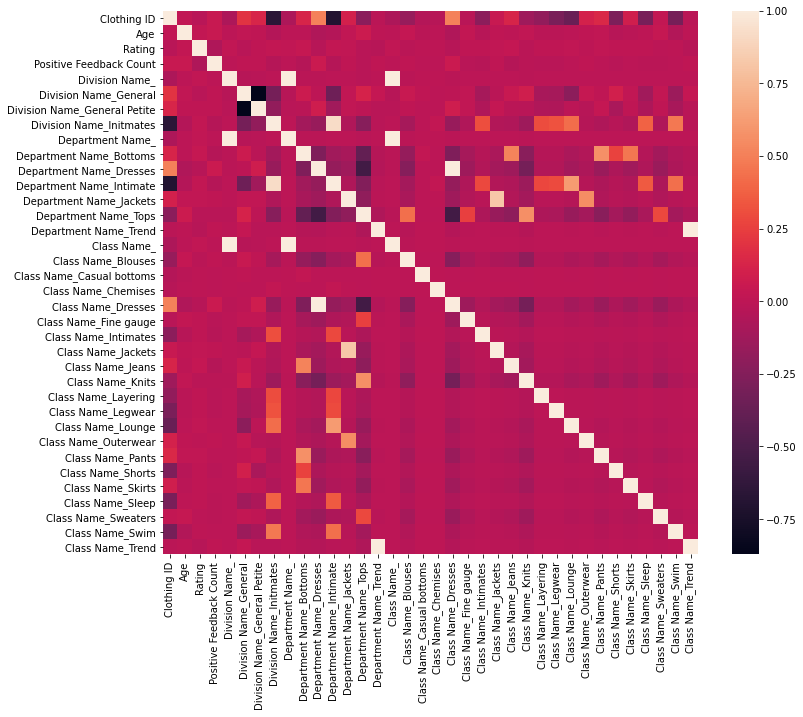

In [55]:
#Visually inspect the Pearson Correlations of each feature
plt.figure(figsize=(12,10))
# Compute the Pearson Correlation of each feature in the training df
cor = df2_mod_feat.corr(method='pearson')
print(cor.shape)
# Plot the correlations
sns.heatmap(cor)
plt.show()

In [80]:
#Initialize a list indicating whether to keep a column in the training df
drop_feat = []
keep_cols = cor.columns.tolist()

for i in range(len(keep_cols)):
    for j in range(i+1, len(keep_cols)):
        if cor.loc[keep_cols[i],keep_cols[j]] > 0.8:
            print("feat1=", keep_cols[i], "feat2=",keep_cols[j])
            if keep_cols[j] in keep_cols:
                print("selecting feature to drop", keep_cols[j])
                drop_feat.append(keep_cols[j])
print("Columns to drop are", drop_feat)  


feat1= Division Name_ feat2= Department Name_
selecting feature to drop Department Name_
feat1= Division Name_ feat2= Class Name_
selecting feature to drop Class Name_
feat1= Division Name_Initmates feat2= Department Name_Intimate
selecting feature to drop Department Name_Intimate
feat1= Department Name_ feat2= Class Name_
selecting feature to drop Class Name_
feat1= Department Name_Dresses feat2= Class Name_Dresses
selecting feature to drop Class Name_Dresses
feat1= Department Name_Jackets feat2= Class Name_Jackets
selecting feature to drop Class Name_Jackets
feat1= Department Name_Trend feat2= Class Name_Trend
selecting feature to drop Class Name_Trend
Columns to drop are ['Department Name_', 'Class Name_', 'Department Name_Intimate', 'Class Name_', 'Class Name_Dresses', 'Class Name_Jackets', 'Class Name_Trend']


In [86]:
# Extract the columns to keep from the feature df
for i in range(len(drop_feat)):
    if drop_feat[i] in keep_cols:
        keep_cols.remove(drop_feat[i])
selected_columns = keep_cols
print("# of Features retatined are =", len(selected_columns))


# of Features retatined are = 30


In [88]:
# Make a new df with the columns we've decided to keep from the training df
df2_mod_feat_fin = df2_mod_feat.loc[:,selected_columns]
print(df2_mod_feat_fin.shape)

(23486, 30)


In [89]:
#Feature Selection on p-value (statistical significance to Y value)
selected_columns = selected_columns[0:]
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        #maxVar = max(regressor_OLS.pvalues).astype(float)
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.01
# Note that we're passing in df_out, not df_train
data_modeled, selected_columns = backwardElimination(df2_mod_feat_fin.values, y, SL, selected_columns)

In [90]:
print('The following columns remain based on p-value selection:')
print(selected_columns)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(f'After selection by Pearson Correlation, we had {df2_mod_feat_fin.shape[1]} features.')
print(f'After selection by p-value, we have {data_red.shape[1]} features.')
print(data_red.columns)
print(y.shape)

The following columns remain based on p-value selection:
['Age' 'Rating' 'Positive Feedback Count' 'Division Name_'
 'Division Name_General' 'Division Name_General Petite'
 'Division Name_Initmates' 'Class Name_Sweaters']
After selection by Pearson Correlation, we had 30 features.
After selection by p-value, we have 8 features.
Index(['Age', 'Rating', 'Positive Feedback Count', 'Division Name_',
       'Division Name_General', 'Division Name_General Petite',
       'Division Name_Initmates', 'Class Name_Sweaters'],
      dtype='object')
(23486, 1)


In [93]:
#Cross-validated LASSO feature importance
# Instantiate the cross-validated LASSO regressor
reg = LassoCV()
# Train the regressor on the reduced df
reg.fit(data_red,y)
### END CODE HERE ###
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(data_red, y))
coef = pd.Series(reg.coef_, index = data_red.columns)
print(f"Lasso picked {sum(coef != 0)} features and eliminated the other {sum(coef == 0)} features")

C:\Users\jgiri\AppData\Local\Continuum\anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best alpha using built-in LassoCV: 0.000336
Best score using built-in LassoCV: 0.628346
Lasso picked 4 features and eliminated the other 4 features


Text(0.5, 1.0, 'Feature importance using Lasso Model')

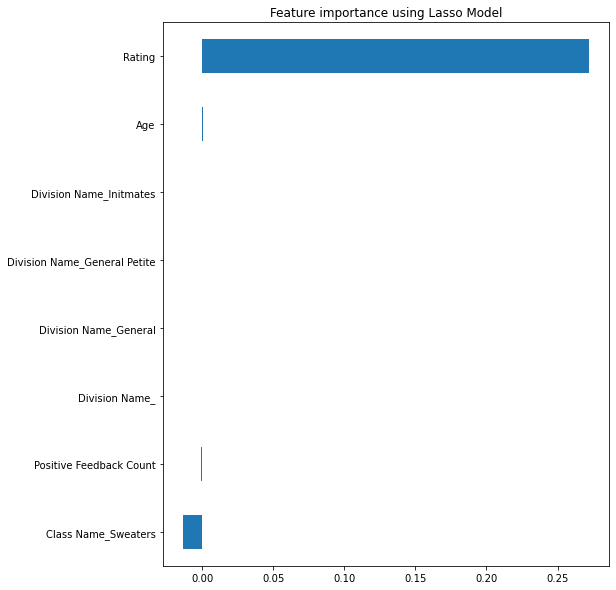

In [94]:
#Visualize the LASSO feature importances
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [95]:
data_red.describe()

,Age,Rating,Positive Feedback Count,Division Name_,Division Name_General,Division Name_General Petite,Division Name_Initmates,Class Name_Sweaters
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,2.535936,0.000596,0.589713,0.345738,0.063953,0.060802
std,12.279544,1.110031,5.702202,0.024408,0.491896,0.475618,0.244674,0.238972
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,52.000000,5.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,99.000000,5.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
from sklearn.model_selection import cross_val_score
from numpy import mean
x_train, x_test, y_train, y_test = train_test_split(data_red.values, np.ravel(y), test_size = 0.3)

In [97]:
# Instantiate the classifier
# Set the max depth to 10 and the random state to 0
clf = RandomForestClassifier(max_depth=10,random_state=0)
# Train the classifier
clf.fit(x_train,y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test,prediction)
print(y_test.shape[0])
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.trace(cm)/y_test.shape[0]
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

7046
Accuracy = 0.9379789951745672
Mean Recall = 0.949
Mean F1 Score = 0.960
[[1141   96]
 [ 341 5468]]


In [98]:
# Instantiate the classifier ("balanced random forest")
# Set the max depth to 10, the random state to 0, and the class_weight to 'balanced'
clf = RandomForestClassifier(max_depth=10,random_state=0,class_weight='balanced')
# Train the classifier
clf.fit(x_train,y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test,prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.trace(cm)/y_test.shape[0]
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.9381209196707352
Mean Recall = 0.939
Mean F1 Score = 0.961
[[1171   66]
 [ 370 5439]]
